In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Folder path
FOLDER_PATH = "Dataset_test"

# List of all the csv files
csv_files = [
    "AlanSantana.csv",
    "CryptoColugo.csv",
    "CRYPTOMOJO_TA.csv",
    "FieryTrading.csv",
    "MoralDisciple.csv",
    "RocketBomb.csv",
    "weslad.csv",
    "without_worries.csv",
    "Xanrox.csv"
]

# Create empty list for all the individual dataframes (in case we might need them later)
dataframes = []

# Loop through each file and add them to the dataframes
for i in csv_files:
    file_path = os.path.join(FOLDER_PATH, i)
    df = pd.read_csv(file_path, dtype={"Timestamp": "int64"})  # making sure the time is displayed in unixtimestamp
    dataframes.append(df)

# Combining all the dataframes into one
df_all = pd.concat(dataframes, ignore_index=True)

df_all

,Trader,Title,Post length,Post type,Timestamp,Text
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...
...,...,...,...,...,...,...
770,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 6,1715965894,Comment:\nNew analysis:
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ..."


In [3]:
# Saving the new dataframe
all_csv_file = os.path.join(FOLDER_PATH, "All_trader.csv")
df_all.to_csv(all_csv_file, index=False, encoding="utf-8")

Now we will add some extra information about each post, this might be used for further analysis

In [4]:
# create new column with word count for each post
df_all["Word count"] = df_all["Text"].apply(lambda x: len(x.split()))
df_all

,Trader,Title,Post length,Post type,Timestamp,Text,Word count
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259
...,...,...,...,...,...,...,...
770,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 6,1715965894,Comment:\nNew analysis:,3
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19


In [5]:
from nltk.corpus import stopwords
# create list of stop words
stop_words = stopwords.words("english")
# len(stop_words)
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [6]:
# create column for amount of stop words in each post
df_all["Stop words count"] = df_all["Text"].apply(lambda x: len([word for word in x.split() if word.lower() in stop_words]))  # make each word lowercase so we wont miss any words
df_all

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122
...,...,...,...,...,...,...,...,...
770,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 6,1715965894,Comment:\nNew analysis:,3,0
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7


In [7]:
# create column for percantage of stop words in each post
df_all["Stop word %"] = round((df_all["Stop words count"] / df_all["Word count"]) * 100, 2)
df_all

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10
...,...,...,...,...,...,...,...,...,...
770,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 6,1715965894,Comment:\nNew analysis:,3,0,0.00
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84


Now we try to clean the dataset as much as possible

In [8]:
# we remove all uppercase letters (since this doesn't matter for our analysis)
df_all["lower_case_text"] = df_all["Text"].apply(lambda x: " ".join(word.lower() for word in x.split()))
df_all["lower_case_text"]

0      i would like to call your attention to bitcoin...
1      comment: lower high on the monthly timeframe.....
2      signals are available everywhere... and new da...
3      comment: 🅱️ time to trade right now we are wit...
4      comment: 🍀 affirmations to attract abundance w...
                             ...                        
770                               comment: new analysis:
771    comment: price perfectly respected the paralle...
772    the price action of bitcoin is relatively bori...
773    comment: on the 1h chart, bitcoin is forming a...
774    bitcoin has finished its corrective pattern (a...
Name: lower_case_text, Length: 775, dtype: object

In [9]:
import re
def remove_punctuation(text):
    pattern = r"(?<!\w)-(?!\w)|(?<!\d)\.(?!\d)|[^\w\s.'-]"
    return re.sub(pattern, '', text)
df_all["Cleaned Text"] = df_all["lower_case_text"].apply(remove_punctuation)
df_all["Cleaned Text"]

0      i would like to call your attention to bitcoin...
1      comment lower high on the monthly timeframe ma...
2      signals are available everywhere and new data ...
3      comment  time to trade right now we are witnes...
4      comment  affirmations to attract abundance whe...
                             ...                        
770                                 comment new analysis
771    comment price perfectly respected the parallel...
772    the price action of bitcoin is relatively bori...
773    comment on the 1h chart bitcoin is forming a h...
774    bitcoin has finished its corrective pattern ab...
Name: Cleaned Text, Length: 775, dtype: object

In [10]:
df_all["Removed stop words"] = df_all["Cleaned Text"].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_all["Removed stop words"]

0      would like call attention bitcoin's monthly ch...
1      comment lower high monthly timeframe maximum p...
2      signals available everywhere new data coming t...
3      comment time trade right witnessing bounce tim...
4      comment affirmations attract abundance wheneve...
                             ...                        
770                                 comment new analysis
771    comment price perfectly respected parallel cha...
772    price action bitcoin relatively boring higher ...
773    comment 1h chart bitcoin forming head shoulder...
774    bitcoin finished corrective pattern abc zigzag...
Name: Removed stop words, Length: 775, dtype: object

We removed the stop words but there are still some words that aren't relevant to the analysis, so we need to remove those aswell

In [11]:
# first we split each post into all the words inside
every_word = " ".join(df_all["Removed stop words"]).split()
# create a pandas series where we can count each occurunce of the words in all the posts
word_count = pd.Series(every_word).value_counts()
word_count

comment      707
bitcoin      455
price        263
chart        215
bullish      214
            ... 
gbtc           1
grayscale      1
record         1
564            1
4th            1
Length: 3679, dtype: int64

In [12]:
# now we need to make an extra list of unnecessary words, so we can remove them from the list
unnecessary_words = ["comment", "i'm", "namaste", "man", "thank", "thanks", "i've", "please", "we're", "yes", "haha", "moraldisciple", "md", "hello", "i'll", "we've", "ww", "friends", "kateryna", "ii", "iii", "dyor", "sincerely", "nfa", "beautiful", "hmm", "update2", "guys", "likes", "messages", "___", "happy", "name", "men", "update1", "xcom", "shit", "imagine", "friendly", "k", "imo", "hey", "weve", "yeah", "tradingviewcom", "tradingview", "fun", "wow", "telegram", "hah", "cry", "fking", "free", "tips", "join", "lol", "welcome", "sms", "honestly", "personally", "commenting", "tradingview's", "hahaha", "sorry", "fck", "community", "____", "__", "users", "sincere", "dear-dear", "hahah", "angel's", "pizza", "-x", "xdd", "shut", "fool", "idiot", "bro", "nah", "moraldiciple", "wee", "they're", "kitten", "mount", "everest", "boys", "apologize", "subscribe", "youre", "congratulations", "dearest", "vehicle", "eternal", "willl", "lovely", "clean", "pray", "ashamed", "contemplate", "meditate", "judiciously", "constructively", "nay", "idiots", "i'd", "wwwtradingviewcomger-indicator-45015", "elephants", "elephants", "xcomvivek4real_st1794803021442166874", "hahaxd", "fucked", "brainless", "tik-tak-tik-tak", "females", "update3", "seer", "fuck", "hahahagha", "anywayyy", "email", "notifications", "machinexdxxdxdxd", "oops"]
len(unnecessary_words)

125

In [13]:
df_all["Final Text"] = df_all["Removed stop words"].apply(lambda x: " ".join(word for word in x.split() if word not in unnecessary_words))
df_all["Final Text"]

0      would like call attention bitcoin's monthly ch...
1      lower high monthly timeframe maximum pain inco...
2      signals available everywhere new data coming t...
3      time trade right witnessing bounce time import...
4      affirmations attract abundance whenever feelin...
                             ...                        
770                                         new analysis
771    price perfectly respected parallel channel kee...
772    price action bitcoin relatively boring higher ...
773    1h chart bitcoin forming head shoulders patter...
774    bitcoin finished corrective pattern abc zigzag...
Name: Final Text, Length: 775, dtype: object

In [14]:
# there are some rows that only have 3 or less words in them because they originally also contain a picture, but since we dont want to look at that we want to remove those rows
def word_count(text):
    return len(text.split())

df_all['Word_Count'] = df_all["Final Text"].apply(word_count)
df_final = df_all[df_all['Word_Count'] > 3]
df_final = df_final.drop(columns=['Word_Count'])
df_final

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,lower_case_text,Cleaned Text,Removed stop words,Final Text
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06,i would like to call your attention to bitcoin...,i would like to call your attention to bitcoin...,would like call attention bitcoin's monthly ch...,would like call attention bitcoin's monthly ch...
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77,comment: lower high on the monthly timeframe.....,comment lower high on the monthly timeframe ma...,comment lower high monthly timeframe maximum p...,lower high monthly timeframe maximum pain inco...
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92,signals are available everywhere... and new da...,signals are available everywhere and new data ...,signals available everywhere new data coming t...,signals available everywhere new data coming t...
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70,comment: 🅱️ time to trade right now we are wit...,comment time to trade right now we are witnes...,comment time trade right witnessing bounce tim...,time trade right witnessing bounce time import...
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10,comment: 🍀 affirmations to attract abundance w...,comment affirmations to attract abundance whe...,comment affirmations attract abundance wheneve...,affirmations attract abundance whenever feelin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 5,1715923856,"Comment:\nBitcoin is pumping, thanks for readi...",9,3,33.33,"comment: bitcoin is pumping, thanks for readin...",comment bitcoin is pumping thanks for reading ...,comment bitcoin pumping thanks reading idea,bitcoin pumping reading idea
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00,comment: price perfectly respected the paralle...,comment price perfectly respected the parallel...,comment price perfectly respected parallel cha...,price perfectly respected parallel channel kee...
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69,the price action of bitcoin is relatively bori...,the price action of bitcoin is relatively bori...,price action bitcoin relatively boring higher ...,price action bitcoin relatively boring higher ...
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84,"comment: on the 1h chart, bitcoin is forming a...",comment on the 1h chart bitcoin is forming a h...,comment 1h chart bitcoin forming head shoulder...,1h chart bitcoin forming head shoulders patter...


# lemmatization

In [15]:
#!pip install textblob

In [16]:
from textblob import Word

In [17]:
def lemmatize_and_count(text):
    original_words = text.split()
    lemmatized_words = [Word(word).lemmatize() for word in original_words]
    lemmatized_count = sum(1 for original, lemmatized in zip(original_words, lemmatized_words) if original != lemmatized)
    return ' '.join(lemmatized_words), lemmatized_count

# Apply the function to the DataFrame and create new columns
df_final['Lemmatized'], df_final['Lemmatized_Count'] = zip(*df_final['Final Text'].apply(lemmatize_and_count))
df_final['Lemmatized_Count']

0       3
1       0
2      15
3      18
4      14
       ..
769     0
771     1
772    13
773     1
774     4
Name: Lemmatized_Count, Length: 647, dtype: int64

In [18]:
df_final

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,lower_case_text,Cleaned Text,Removed stop words,Final Text,Lemmatized,Lemmatized_Count
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06,i would like to call your attention to bitcoin...,i would like to call your attention to bitcoin...,would like call attention bitcoin's monthly ch...,would like call attention bitcoin's monthly ch...,would like call attention bitcoin's monthly ch...,3
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77,comment: lower high on the monthly timeframe.....,comment lower high on the monthly timeframe ma...,comment lower high monthly timeframe maximum p...,lower high monthly timeframe maximum pain inco...,lower high monthly timeframe maximum pain inco...,0
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92,signals are available everywhere... and new da...,signals are available everywhere and new data ...,signals available everywhere new data coming t...,signals available everywhere new data coming t...,signal available everywhere new data coming ti...,15
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70,comment: 🅱️ time to trade right now we are wit...,comment time to trade right now we are witnes...,comment time trade right witnessing bounce tim...,time trade right witnessing bounce time import...,time trade right witnessing bounce time import...,18
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10,comment: 🍀 affirmations to attract abundance w...,comment affirmations to attract abundance whe...,comment affirmations attract abundance wheneve...,affirmations attract abundance whenever feelin...,affirmation attract abundance whenever feeling...,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 5,1715923856,"Comment:\nBitcoin is pumping, thanks for readi...",9,3,33.33,"comment: bitcoin is pumping, thanks for readin...",comment bitcoin is pumping thanks for reading ...,comment bitcoin pumping thanks reading idea,bitcoin pumping reading idea,bitcoin pumping reading idea,0
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00,comment: price perfectly respected the paralle...,comment price perfectly respected the parallel...,comment price perfectly respected parallel cha...,price perfectly respected parallel channel kee...,price perfectly respected parallel channel kee...,1
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69,the price action of bitcoin is relatively bori...,the price action of bitcoin is relatively bori...,price action bitcoin relatively boring higher ...,price action bitcoin relatively boring higher ...,price action bitcoin relatively boring higher ...,13
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84,"comment: on the 1h chart, bitcoin is forming a...",comment on the 1h chart bitcoin is forming a h...,comment 1h chart bitcoin forming head shoulder...,1h chart bitcoin forming head shoulders patter...,1h chart bitcoin forming head shoulder pattern...,1


# Sentiment Analysis

In [19]:
from textblob import TextBlob as tb
# Polarity means the sentiment of the text (in range of -1 to 1)
df_final["Polarity"] = df_final["Lemmatized"].apply(lambda x: tb(x).sentiment[0])
df_final["Polarity"]

0     -0.005841
1      0.160000
2      0.137759
3      0.112534
4      0.485248
         ...   
769    0.000000
771    0.337500
772    0.140561
773    0.000000
774    0.126389
Name: Polarity, Length: 647, dtype: float64

In [20]:
# subjectivity means the degree to which the text is subjective (in range of 0 to 1)
df_final["Subjectivity"] = df_final["Lemmatized"].apply(lambda x: tb(x).sentiment[1])
df_final["Subjectivity"]

0      0.400930
1      0.540000
2      0.487588
3      0.460599
4      0.583437
         ...   
769    0.000000
771    0.475000
772    0.458418
773    0.000000
774    0.406250
Name: Subjectivity, Length: 647, dtype: float64

In [21]:
df_final

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,lower_case_text,Cleaned Text,Removed stop words,Final Text,Lemmatized,Lemmatized_Count,Polarity,Subjectivity
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06,i would like to call your attention to bitcoin...,i would like to call your attention to bitcoin...,would like call attention bitcoin's monthly ch...,would like call attention bitcoin's monthly ch...,would like call attention bitcoin's monthly ch...,3,-0.005841,0.400930
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77,comment: lower high on the monthly timeframe.....,comment lower high on the monthly timeframe ma...,comment lower high monthly timeframe maximum p...,lower high monthly timeframe maximum pain inco...,lower high monthly timeframe maximum pain inco...,0,0.160000,0.540000
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92,signals are available everywhere... and new da...,signals are available everywhere and new data ...,signals available everywhere new data coming t...,signals available everywhere new data coming t...,signal available everywhere new data coming ti...,15,0.137759,0.487588
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70,comment: 🅱️ time to trade right now we are wit...,comment time to trade right now we are witnes...,comment time trade right witnessing bounce tim...,time trade right witnessing bounce time import...,time trade right witnessing bounce time import...,18,0.112534,0.460599
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10,comment: 🍀 affirmations to attract abundance w...,comment affirmations to attract abundance whe...,comment affirmations attract abundance wheneve...,affirmations attract abundance whenever feelin...,affirmation attract abundance whenever feeling...,14,0.485248,0.583437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 5,1715923856,"Comment:\nBitcoin is pumping, thanks for readi...",9,3,33.33,"comment: bitcoin is pumping, thanks for readin...",comment bitcoin is pumping thanks for reading ...,comment bitcoin pumping thanks reading idea,bitcoin pumping reading idea,bitcoin pumping reading idea,0,0.000000,0.000000
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00,comment: price perfectly respected the paralle...,comment price perfectly respected the parallel...,comment price perfectly respected parallel cha...,price perfectly respected parallel channel kee...,price perfectly respected parallel channel kee...,1,0.337500,0.475000
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69,the price action of bitcoin is relatively bori...,the price action of bitcoin is relatively bori...,price action bitcoin relatively boring higher ...,price action bitcoin relatively boring higher ...,price action bitcoin relatively boring higher ...,13,0.140561,0.458418
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84,"comment: on the 1h chart, bitcoin is forming a...",comment on the 1h chart bitcoin is forming a h...,comment 1h chart bitcoin forming head shoulder...,1h chart bitcoin forming head shoulders patter...,1h chart bitcoin forming head shoulder pattern...,1,0.00000

In [22]:
df_final.describe()

,Post length,Timestamp,Word count,Stop words count,Stop word %,Lemmatized_Count,Polarity,Subjectivity
count,647.000000,6.470000e+02,647.000000,647.000000,647.000000,647.000000,647.000000,647.000000
mean,76.891808,1.714600e+09,70.236476,30.551777,40.799335,3.290572,0.092757,0.394960
std,93.059773,4.489649e+06,103.069176,47.331942,10.826951,6.262248,0.200324,0.249621
min,1.000000,1.653506e+09,5.000000,0.000000,0.000000,0.000000,-0.800000,0.000000
25%,8.000000,1.713643e+09,15.500000,6.000000,36.360000,0.000000,0.000000,0.250000
50%,21.000000,1.715677e+09,33.000000,15.000000,42.220000,1.000000,0.050000,0.415814
75%,221.000000,1.716697e+09,73.500000,33.000000,47.740000,3.000000,0.187500,0.536195
max,221.000000,1.718218e+09,863.000000,413.000000,66.670000,52.000000,1.000000,1.000000


If we look at the mean for polarity we can see that its above 0 so on average the post are more positive than negative, however its a very small number meaning that the ratio of positive/negative is around the same. For subjectivity we can see that the mean is below 0.5 meaning that the post on average are more objective than subjective.

In [23]:
# we want to clean the overall dataset since we have a bunch of columns we dont use
df_final.drop(columns=["lower_case_text", "Cleaned Text", "Removed stop words", "Final Text"], axis=1, inplace=True)

In [24]:
pd.set_option('display.max_rows', 100)
df_final

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,Lemmatized,Lemmatized_Count,Polarity,Subjectivity
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06,would like call attention bitcoin's monthly ch...,3,-0.005841,0.400930
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77,lower high monthly timeframe maximum pain inco...,0,0.160000,0.540000
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92,signal available everywhere new data coming ti...,15,0.137759,0.487588
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70,time trade right witnessing bounce time import...,18,0.112534,0.460599
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10,affirmation attract abundance whenever feeling...,14,0.485248,0.583437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 5,1715923856,"Comment:\nBitcoin is pumping, thanks for readi...",9,3,33.33,bitcoin pumping reading idea,0,0.000000,0.000000
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00,price perfectly respected parallel channel kee...,1,0.337500,0.475000
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69,price action bitcoin relatively boring higher ...,13,0.140561,0.458418
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84,1h chart bitcoin forming head shoulder pattern...,1,0.000000,0.000000


In [25]:
# removing extra rows because they aren't nessacerry
title_to_remove = 'A Practical Guide For Candlestick Patterns!'
df_final.drop(df_final[df_final["Title"] == title_to_remove].index, inplace=True)

In [26]:
df_final

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,Lemmatized,Lemmatized_Count,Polarity,Subjectivity
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06,would like call attention bitcoin's monthly ch...,3,-0.005841,0.400930
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77,lower high monthly timeframe maximum pain inco...,0,0.160000,0.540000
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92,signal available everywhere new data coming ti...,15,0.137759,0.487588
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70,time trade right witnessing bounce time import...,18,0.112534,0.460599
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10,affirmation attract abundance whenever feeling...,14,0.485248,0.583437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 5,1715923856,"Comment:\nBitcoin is pumping, thanks for readi...",9,3,33.33,bitcoin pumping reading idea,0,0.000000,0.000000
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00,price perfectly respected parallel channel kee...,1,0.337500,0.475000
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69,price action bitcoin relatively boring higher ...,13,0.140561,0.458418
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84,1h chart bitcoin forming head shoulder pattern...,1,0.000000,0.000000


In [27]:
df_final.sort_values(by="Polarity")

,Trader,Title,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,Lemmatized,Lemmatized_Count,Polarity,Subjectivity
545,MoralDisciple,Bitcoin makes good profit. Now is just the beg...,221,Update post 151,1715198991,Comment:\nI like to follow stupid traders on x...,17,7,41.18,like follow stupid trader know maybe quirk,1,-0.80,1.000000
399,MoralDisciple,Bitcoin makes good profit. Now is just the beg...,221,Update post 5,1711551207,Comment:\nUnderstanding EUR/USD is certainly n...,17,8,47.06,understanding eurusd certainly bad clicking pi...,0,-0.70,0.666667
402,MoralDisciple,Bitcoin makes good profit. Now is just the beg...,221,Update post 8,1711841847,"Comment:\nThe simpler you analyze, the more wr...",10,5,50.00,simpler analyze wrong analyze,0,-0.50,0.900000
535,MoralDisciple,Bitcoin makes good profit. Now is just the beg...,221,Update post 141,1714920854,"Comment:\nThis may be wrong, but I want eviden...",15,6,40.00,may wrong want evidence destroys analysis 5d c...,0,-0.50,0.900000
537,MoralDisciple,Bitcoin makes good profit. Now is just the beg...,221,Update post 143,1715082827,Comment:\nBtc pumped and at the same time 1w m...,55,23,41.82,btc pumped time 1w macd crossed bear today mak...,2,-0.50,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,CRYPTOMOJO_TA,#ETH forming this massive falling wedge!,20,Update post 1,1715405394,Comment:\n\n#Bitcoin breaks down the 100MA sup...,52,20,38.46,bitcoin break 100ma support close candle may d...,4,0.75,0.400000
337,MoralDisciple,MATIC polygon analysis,29,Update post 20,1716046850,Comment:\nExtremely good! the feel of the mega...,29,11,37.93,extremely good feel mega max level good may bt...,1,0.80,0.733333
767,Xanrox,Bitcoin - new ATH soon. Best time to buy now,8,Update post 3,1715168183,"Comment:\nBitcoin is re-testing this channel, ...",12,5,41.67,bitcoin re-testing channel great buying opport...,0,0.80,0.750000
531,MoralDisciple,Bitcoin makes good profit. Now is just the beg...,221,Update post 137,1714768390,Comment:\nI am waiting for a comment on the RS...,22,11,50.00,waiting rsi yellowgreen area april 27 perfect ...,0,1.00,1.000000


we want to create a graph that shows the relation between 2 post, to do that we need to create a new column with the topic of each post. The topic will be the name of the coin the post is about

In [28]:
def determine_topic(row):
    title = row['Title'].lower()
    text = row['Text'].lower()
    if 'bitcoin' in title or 'btc' in title or 'bitcoin' in text or 'btc' in text:
        return 'Bitcoin'
    elif 'ethereum' in title or 'eth' in title or 'ethereum' in text or 'eth' in text:
        return 'Ethereum'
    elif 'bnb' in title or 'bnb' in text:
        return 'BNB'
    elif 'solana' in title or 'sol' in title or 'solana' in text or 'sol' in text:
        return 'Solana'
    elif 'ripple' in title or 'xrp' in title or 'riple' in text or 'xrp' in text:
        return 'XRP'
    elif 'dogecoin' in title or 'doge' in title or 'dogecoin' in text or 'doge' in text:
        return 'Dogecoin'
    elif 'toncoin' in title or 'ton' in title or 'toncoin' in text or 'ton' in text:
        return 'Toncoin'
    elif 'cardano' in title or 'ada' in title or 'cardano' in text or 'ada' in text:
        return 'Cardano'
    elif 'avalanche' in title or 'avax' in title or 'avalanche' in text or 'avax' in text:
        return 'Avalanche'
    elif 'shiba' in title or 'shib' in title or 'shiba' in text or 'shib' in text:
        return 'Shiba Inu' 
    elif 'tron' in title or 'trx' in title or 'tron' in text or 'trx' in text:
        return 'Tron'
    elif 'polkadot' in title or 'dot' in title or 'polkadot' in text or 'dot' in text:
        return 'Polkadot'
    elif 'bitcoin cash' in title or 'bch' in title or 'bitcoin cash' in text or 'bch' in text:
        return 'Bitcoin Cash'
    elif 'chainlink' in title or 'link' in title or 'chainlink' in text or 'link' in text:
        return 'Chainlink'
    elif 'polygon' in title or 'matic' in title or 'polygon' in text or 'matic' in text:
        return 'Polygon'
    elif 'near' in title or 'near' in text:
        return 'NEAR Protocol'
    elif 'litecoin' in title or 'ltc' in title or 'litecoin' in text or 'ltc' in text:
        return 'Litecoin'
    elif 'internet computer' in title or 'icp' in title or 'internet computer' in text or 'icp' in text:
        return 'Internet computer'
    elif 'leo' in title or 'leo' in text:
        return 'UNUS SED LEO'
    elif 'dai' in title or 'dai' in text:
        return 'DAI'

df_final['Topic'] = df_final.apply(determine_topic, axis=1)

columns = list(df_final.columns)
columns.insert(columns.index('Title') + 1, columns.pop(columns.index('Topic')))
df_final = df_final[columns]

In [29]:
df_final

,Trader,Title,Topic,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,Lemmatized,Lemmatized_Count,Polarity,Subjectivity
0,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,Bitcoin,2,Initial post,1715250618,I would like to call your attention to Bitcoin...,155,59,38.06,would like call attention bitcoin's monthly ch...,3,-0.005841,0.400930
1,AlanSantana,🅱️ Ethereum Will Hit Bottom Before Bitcoin,Bitcoin,2,Update post 1,1718150706,Comment:\nLower high on the monthly timeframe....,13,4,30.77,lower high monthly timeframe maximum pain inco...,0,0.160000,0.540000
2,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,Bitcoin,5,Initial post,1715767526,Signals are available everywhere... And new da...,355,163,45.92,signal available everywhere new data coming ti...,15,0.137759,0.487588
3,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,Bitcoin,5,Update post 1,1715869218,Comment:\n🅱️ Time To Trade\n\nRight now we are...,530,274,51.70,time trade right witnessing bounce time import...,18,0.112534,0.460599
4,AlanSantana,🅱️ Expert Confirms: Bitcoin Set To Crash Below...,Bitcoin,5,Update post 2,1717238906,Comment:\n🍀 AFFIRMATIONS TO ATTRACT ABUNDANCE\...,259,122,47.10,affirmation attract abundance whenever feeling...,14,0.485248,0.583437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
769,Xanrox,Bitcoin - new ATH soon. Best time to buy now,Bitcoin,8,Update post 5,1715923856,"Comment:\nBitcoin is pumping, thanks for readi...",9,3,33.33,bitcoin pumping reading idea,0,0.000000,0.000000
771,Xanrox,Bitcoin - new ATH soon. Best time to buy now,Bitcoin,8,Update post 7,1716020763,Comment:\nPrice perfectly respected the parall...,15,3,20.00,price perfectly respected parallel channel kee...,1,0.337500,0.475000
772,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",Bitcoin,2,Initial post,1715676697,The price action of Bitcoin is relatively bori...,281,134,47.69,price action bitcoin relatively boring higher ...,13,0.140561,0.458418
773,Xanrox,"Bitcoin - Ultimate bottom will be here, but no...",Bitcoin,2,Update post 1,1715755990,"Comment:\nOn the 1h chart, Bitcoin is forming ...",19,7,36.84,1h chart bitcoin forming head shoulder pattern...,1,0.000000,0.000000


In [30]:
df_final.sort_values(by="Timestamp")

,Trader,Title,Topic,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,Lemmatized,Lemmatized_Count,Polarity,Subjectivity
636,weslad,POTENTIAL BITCOIN LIFECYCLE,Bitcoin,3,Initial post,1653505733,"Hello all,\n\nSharing with you today is a pote...",365,145,39.73,sharing today potential long-term view bitcoin...,12,0.076598,0.484727
635,weslad,Bitcoin Trading trading cycle,Bitcoin,1,Initial post,1668055308,This is very long term view and still very muc...,39,18,46.15,long term view still much play according chart...,2,0.012500,0.417708
639,weslad,Dogeusdt Trading idea,Dogecoin,3,Initial post,1690226162,DOGEUSDT is showing signs of forming an Adam a...,102,41,40.20,dogeusdt showing sign forming adam eve pattern...,3,0.213542,0.588542
689,without_worries,Dogecoin - Going up,XRP,7,Initial post,1690302626,but only for a little while. Do not believe th...,102,36,35.29,little believe another january 2021 moment the...,5,0.192045,0.458081
682,without_worries,Polkadot (DOT) to $50,Polkadot,5,Initial post,1692485056,On the above 4-day chart price action has corr...,85,27,31.76,4-day chart price action corrected 90 since se...,3,0.154545,0.369619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,MoralDisciple,UP UP UP Cardano analysis,Bitcoin,43,Update post 39,1718183190,Comment:\nBtc will fall and probably more and ...,13,5,38.46,btc fall probably ada become even cheaper,0,0.000000,0.000000
245,MoralDisciple,UP UP UP Cardano analysis,Bitcoin,43,Update post 40,1718183408,"Comment:\nAfter the ideal btc rsi, I buy ada a...",16,6,37.50,ideal btc rsi buy ada next month maybe,0,0.450000,0.500000
246,MoralDisciple,UP UP UP Cardano analysis,Cardano,43,Update post 41,1718187651,Comment:\nThat's why I'm waiting for spu confi...,8,2,25.00,that's waiting spu confirmation,0,0.000000,0.000000
247,MoralDisciple,UP UP UP Cardano analysis,Bitcoin,43,Update post 42,1718194116,"Comment:\nWith this theory, I expect that the ...",39,21,53.85,theory expect rsi fall btc price stay roughly ...,0,0.018182,0.427273


In [31]:
#!pip install networkx

In [32]:
#pip install --upgrade matplotlib networkx

Note: you may need to restart the kernel to use updated packages.


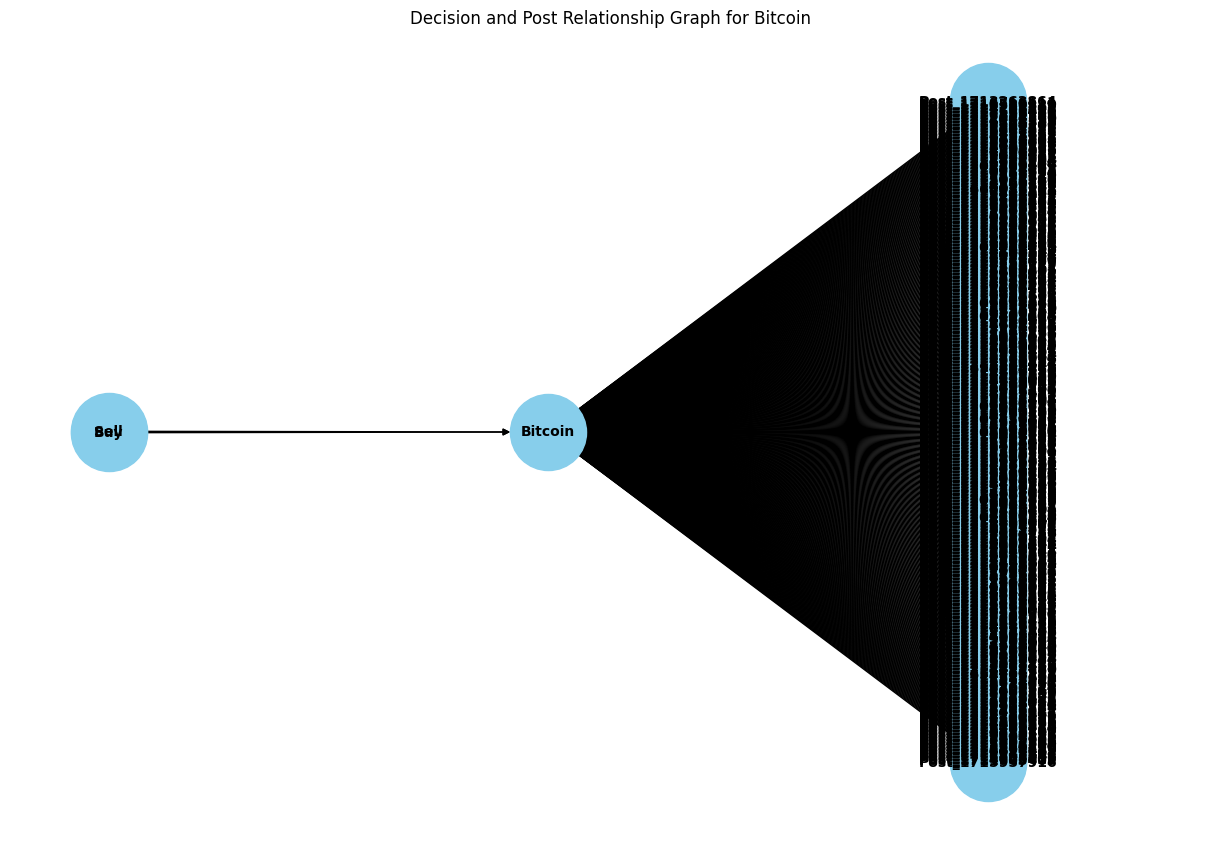

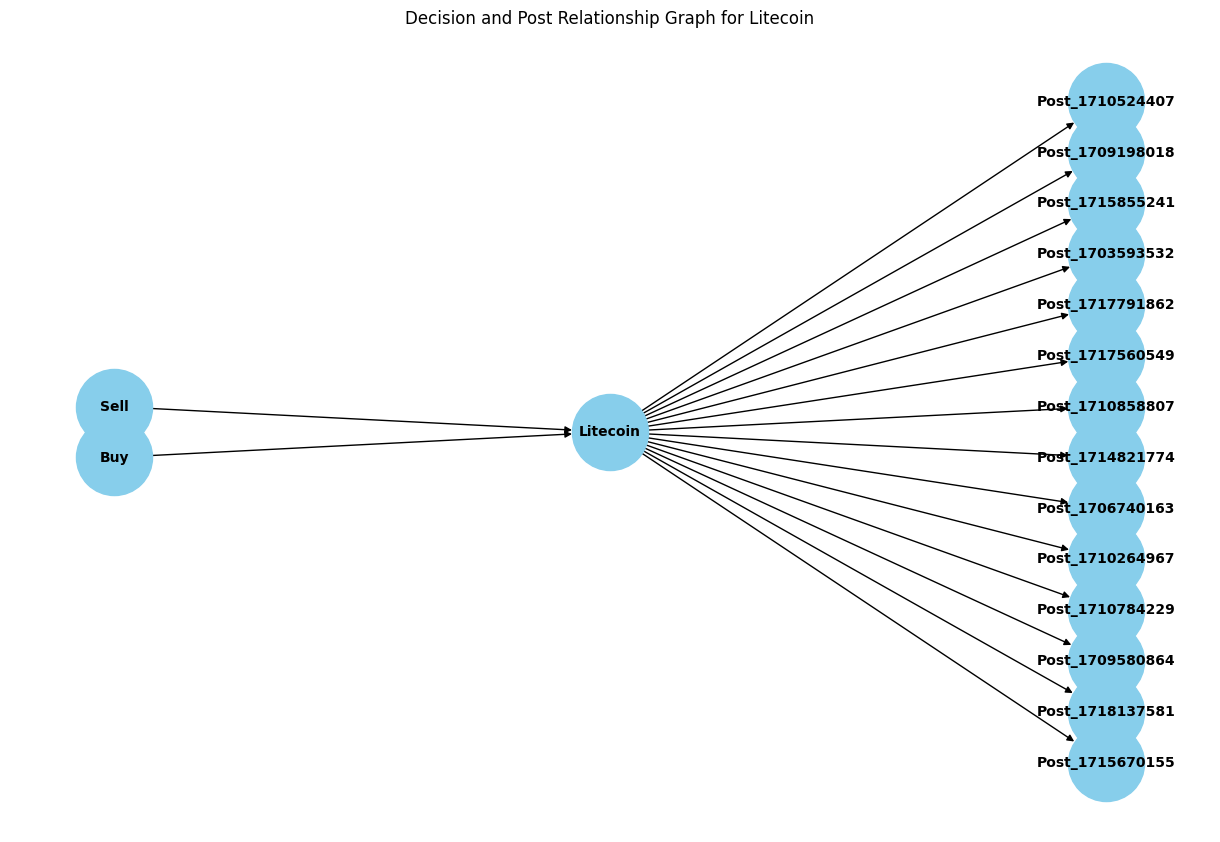

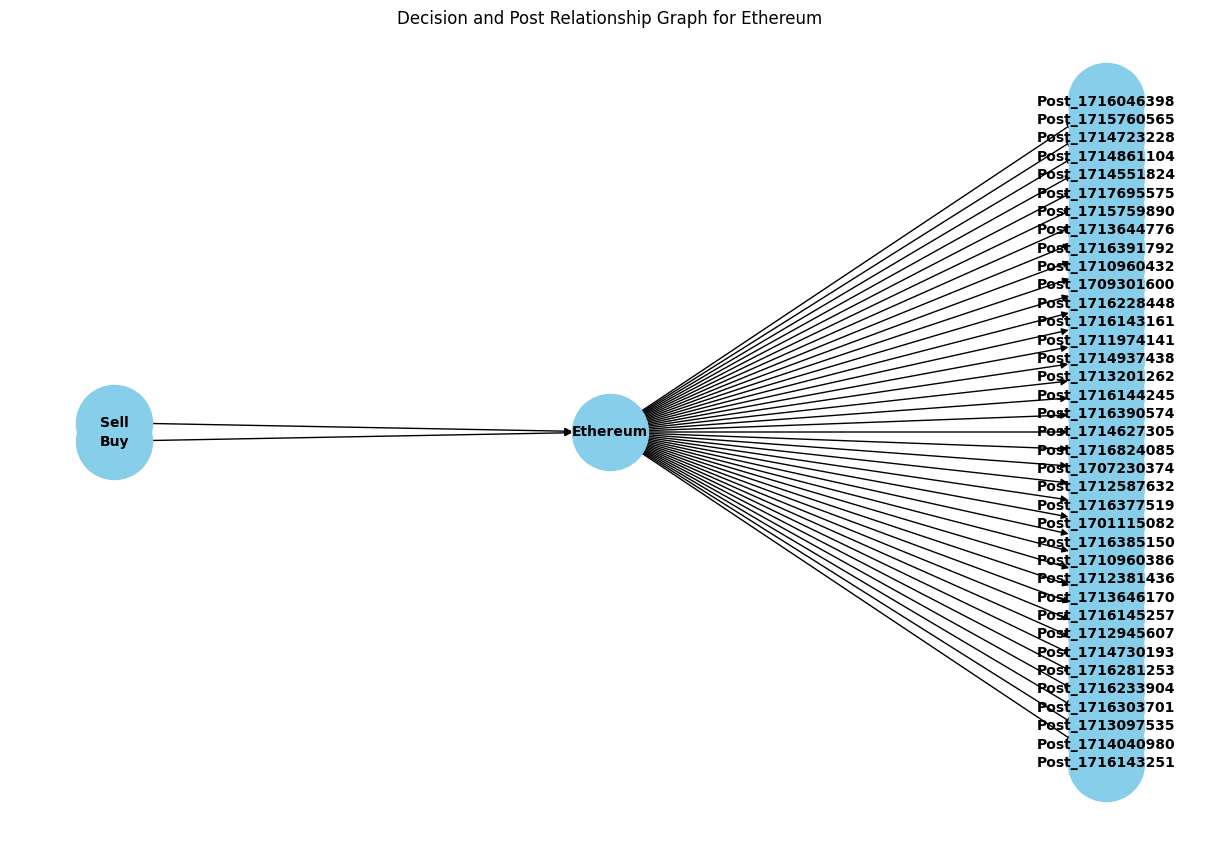

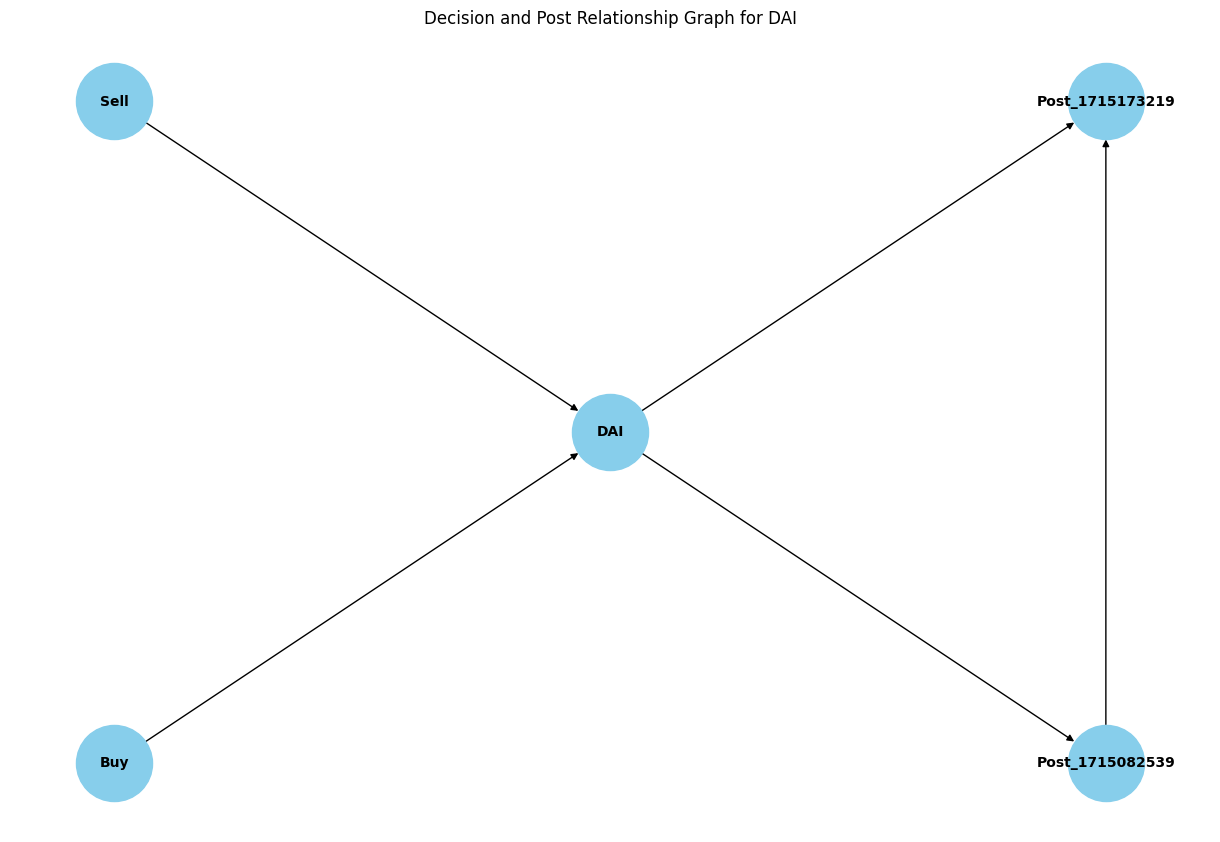

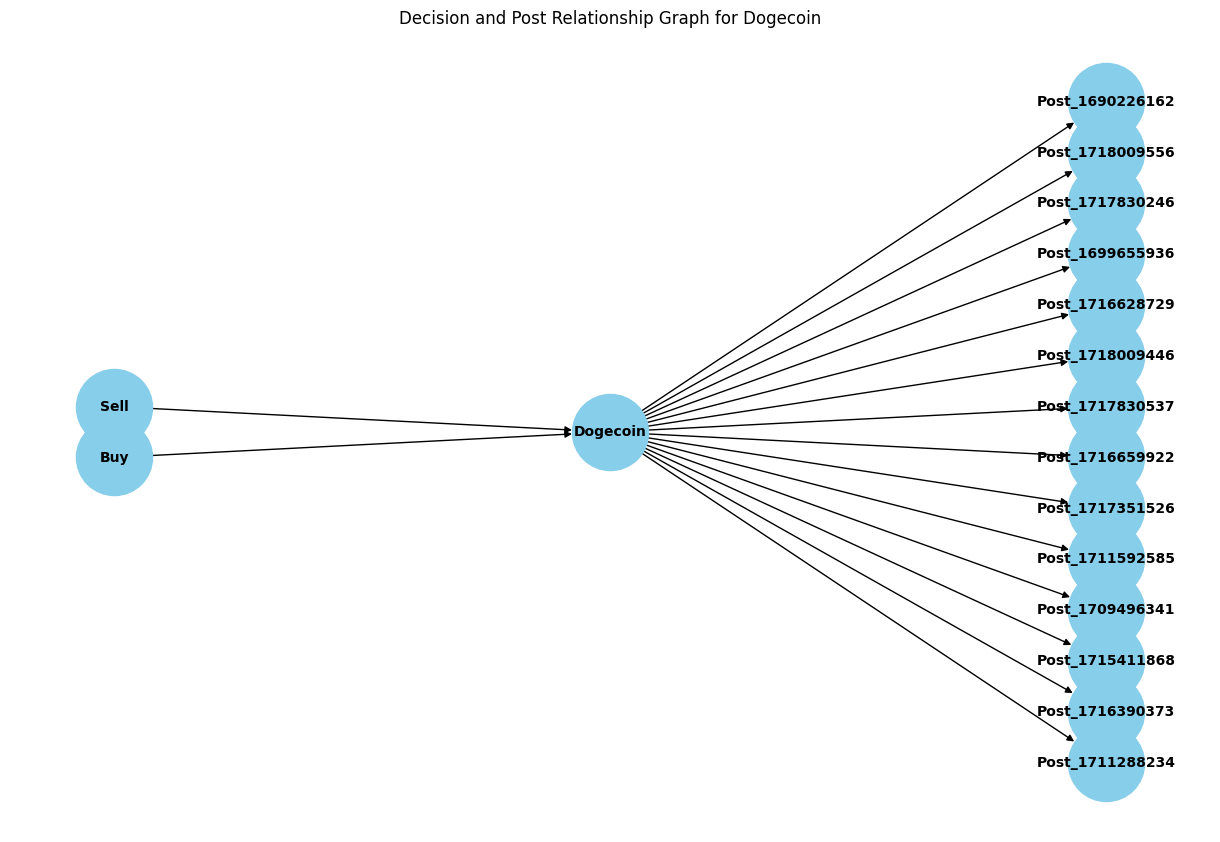

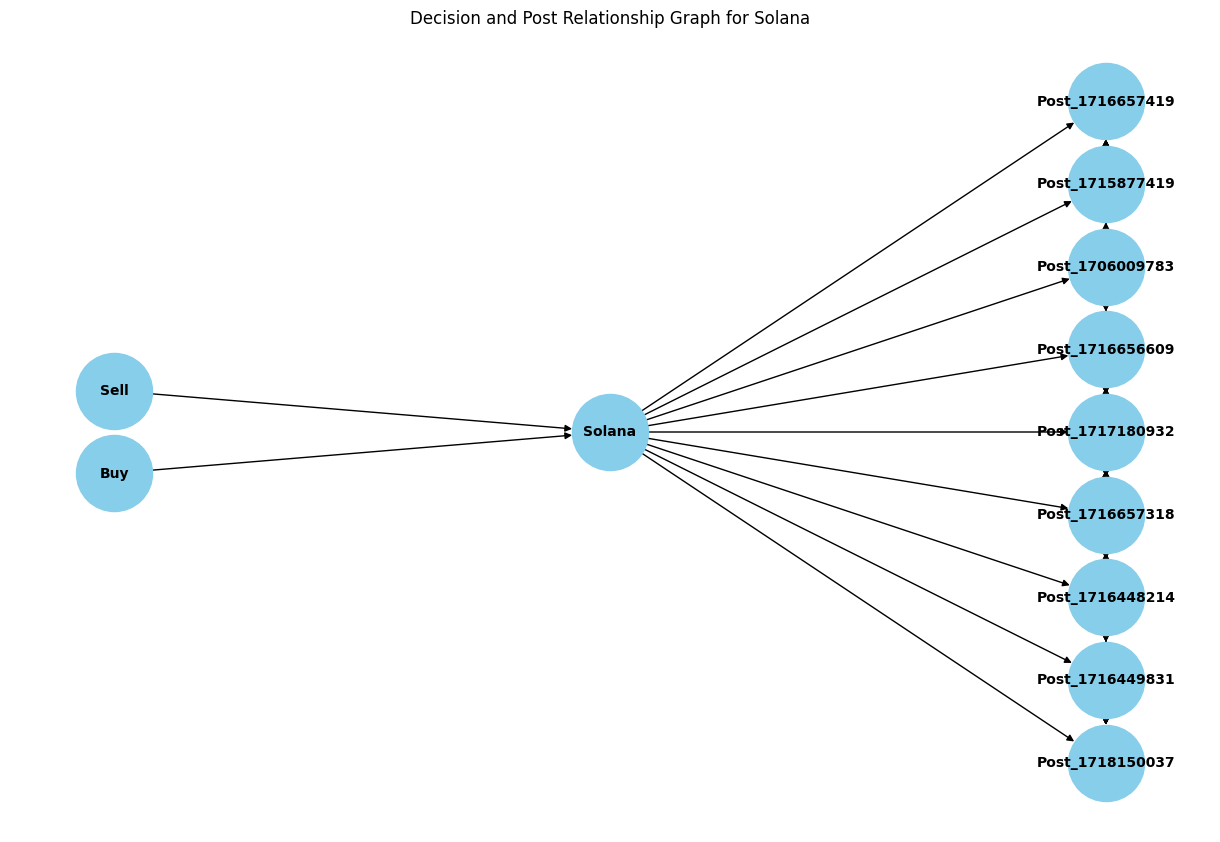

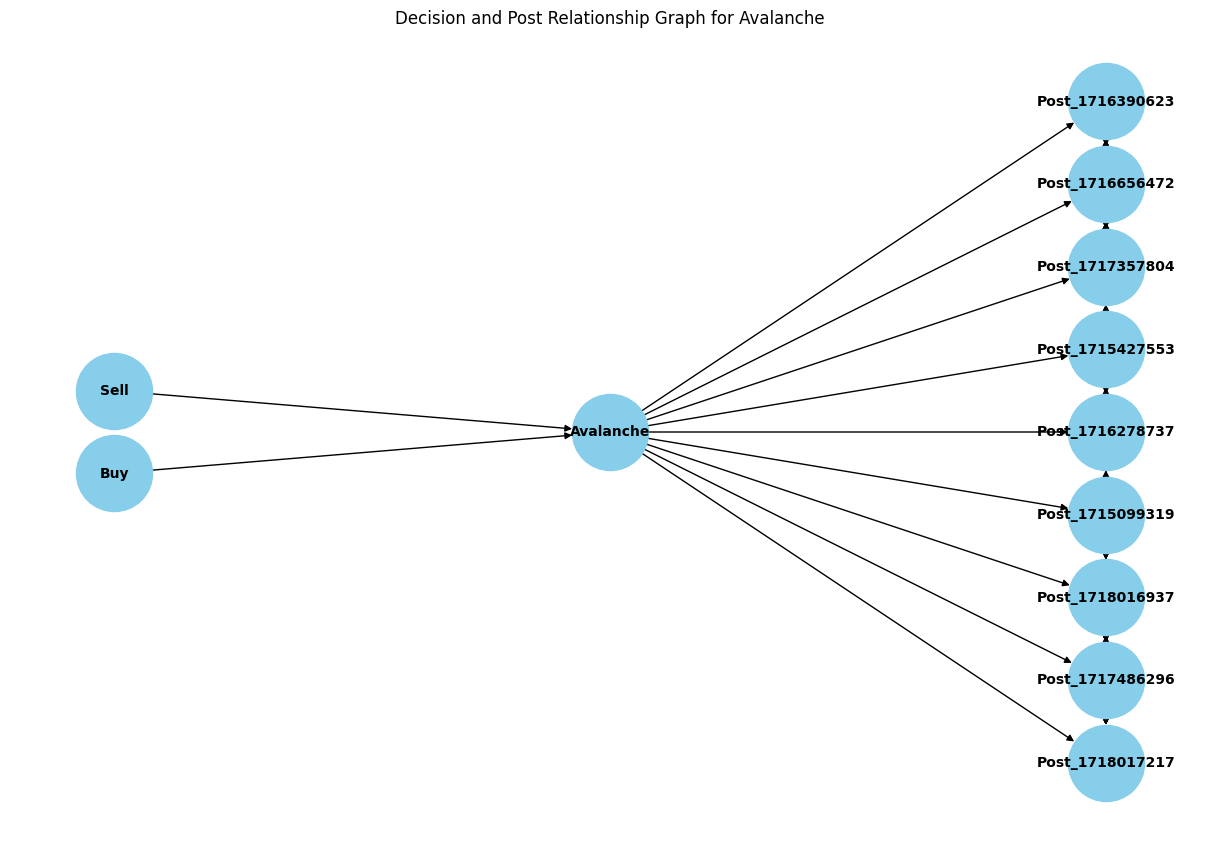

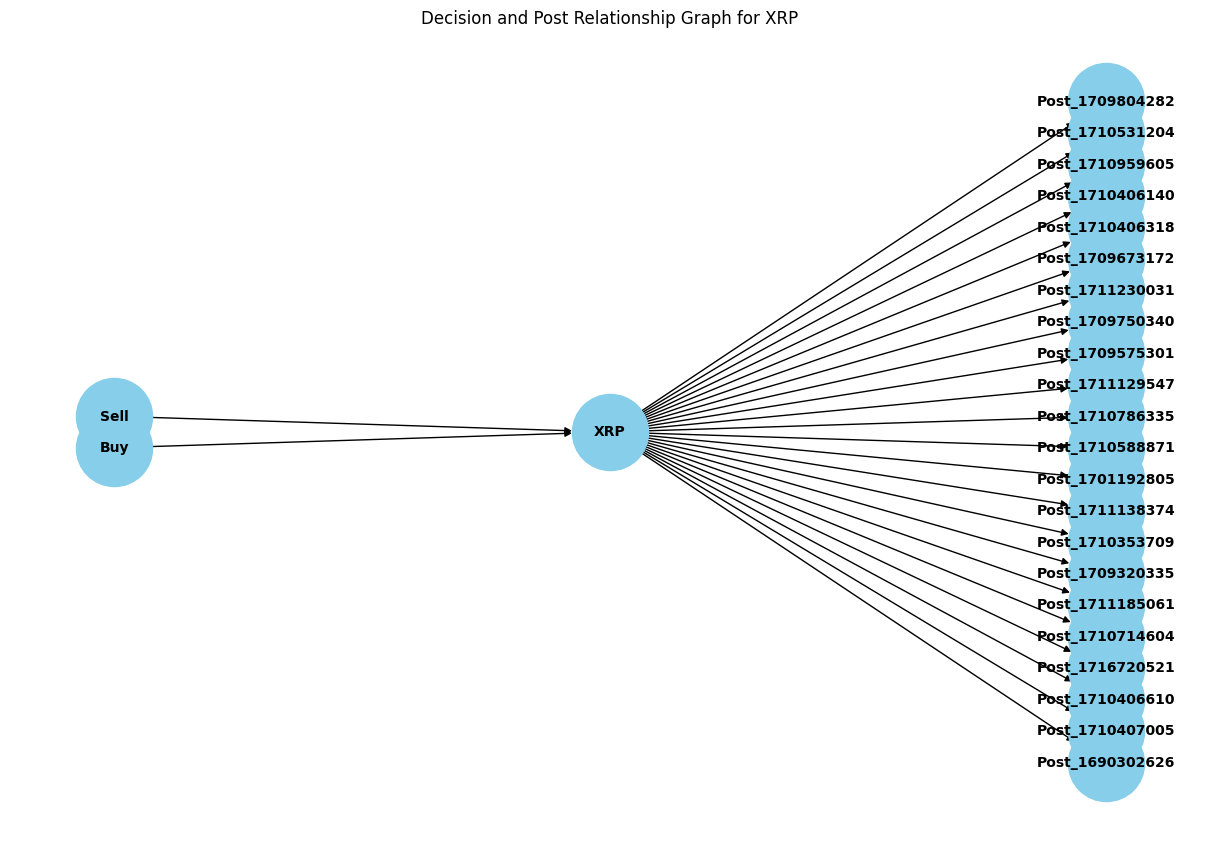

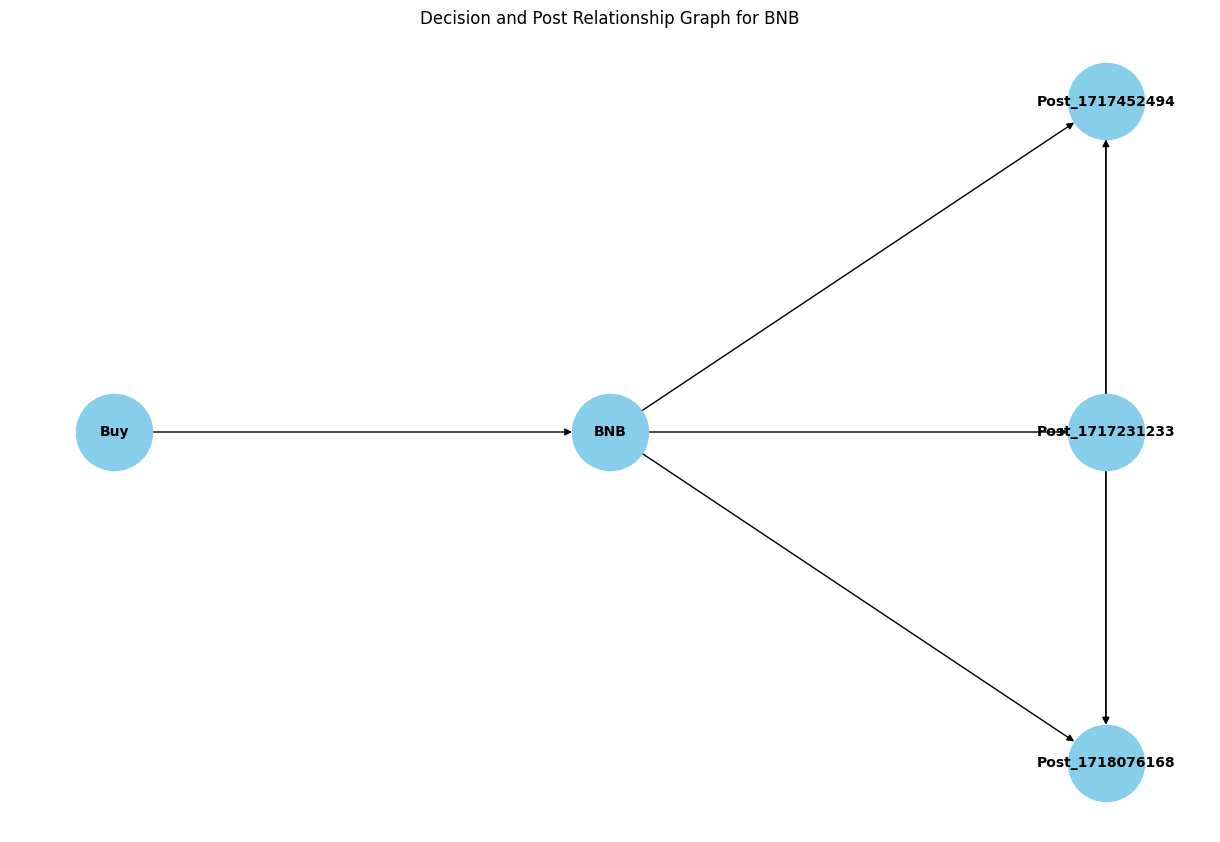

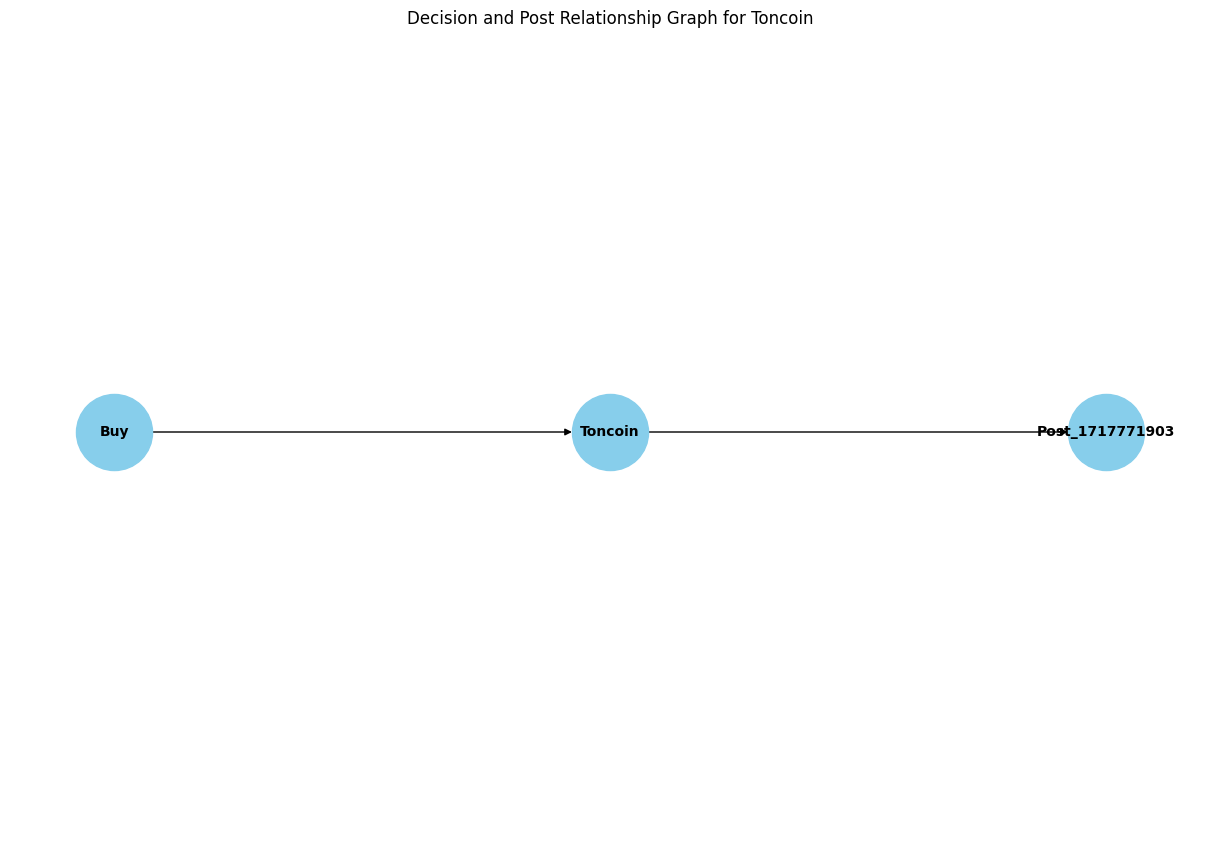

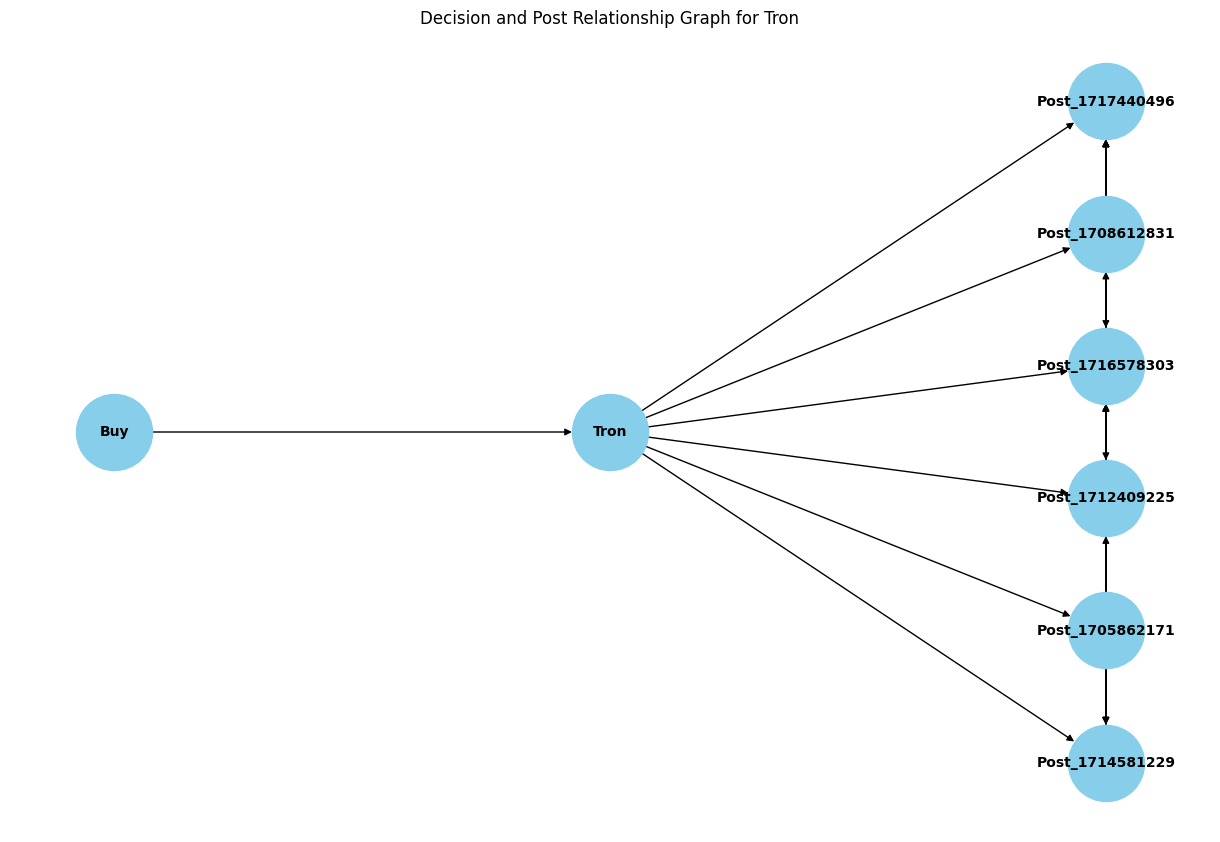

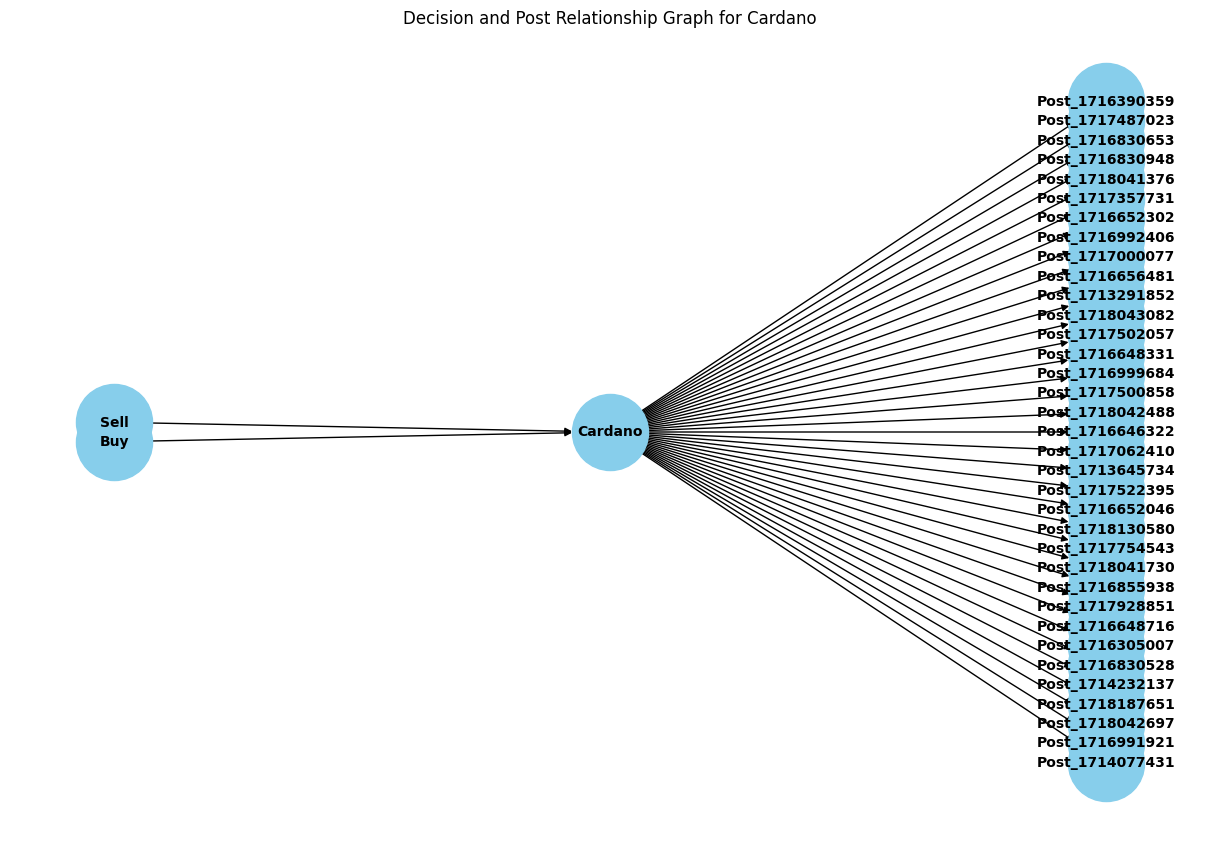

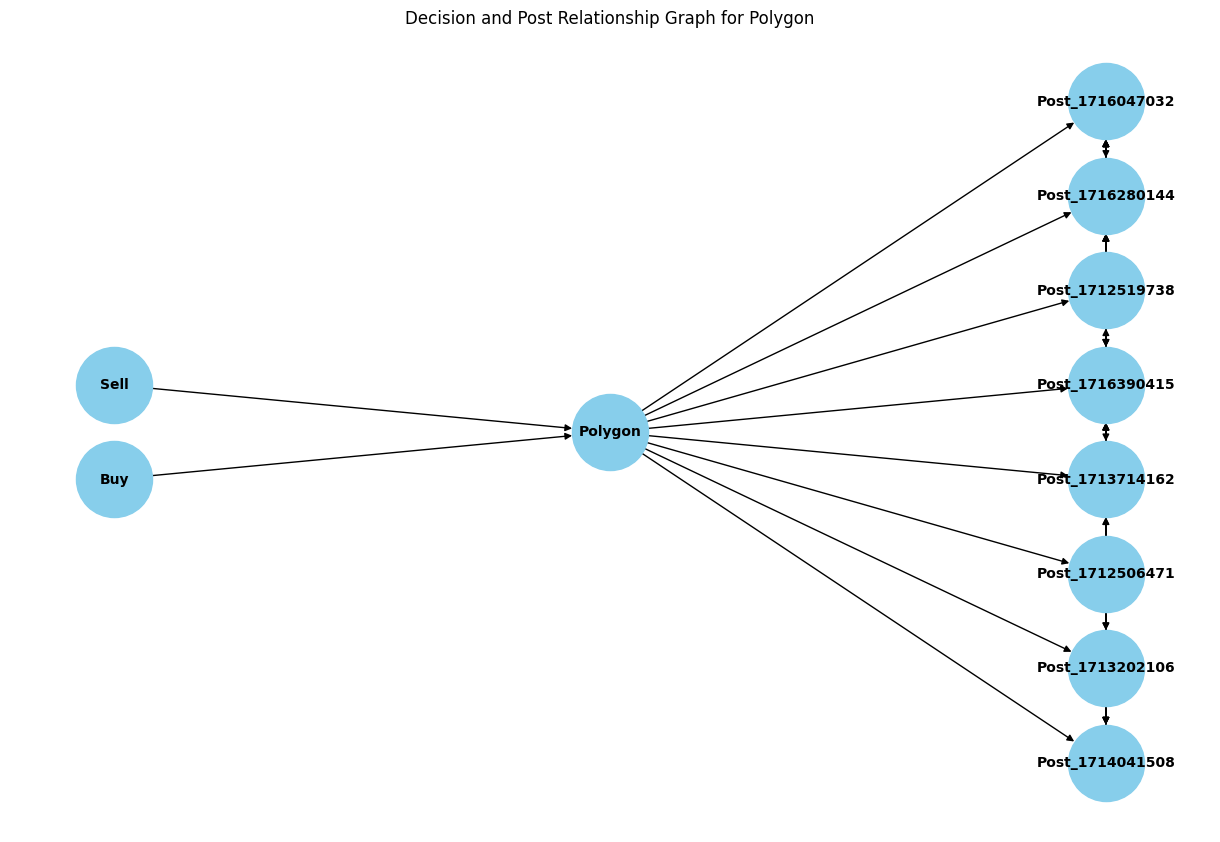

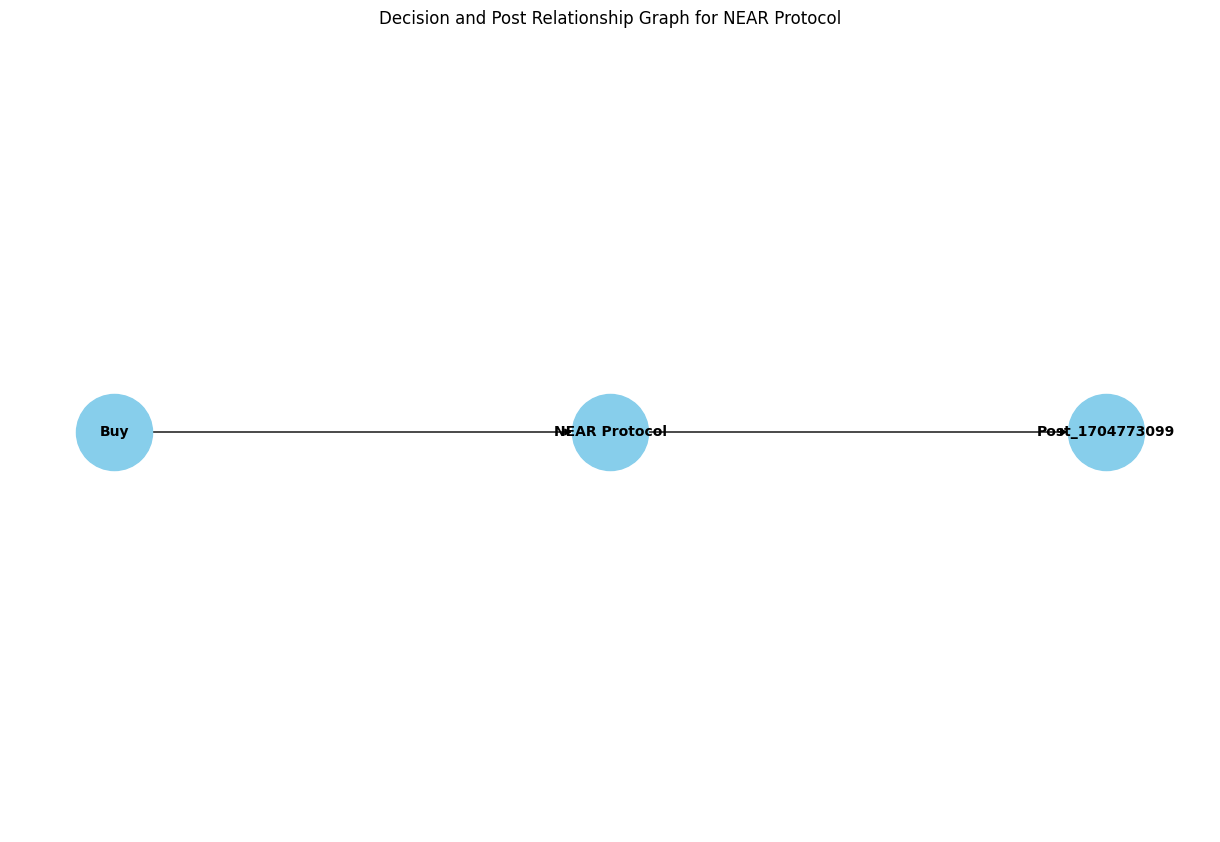

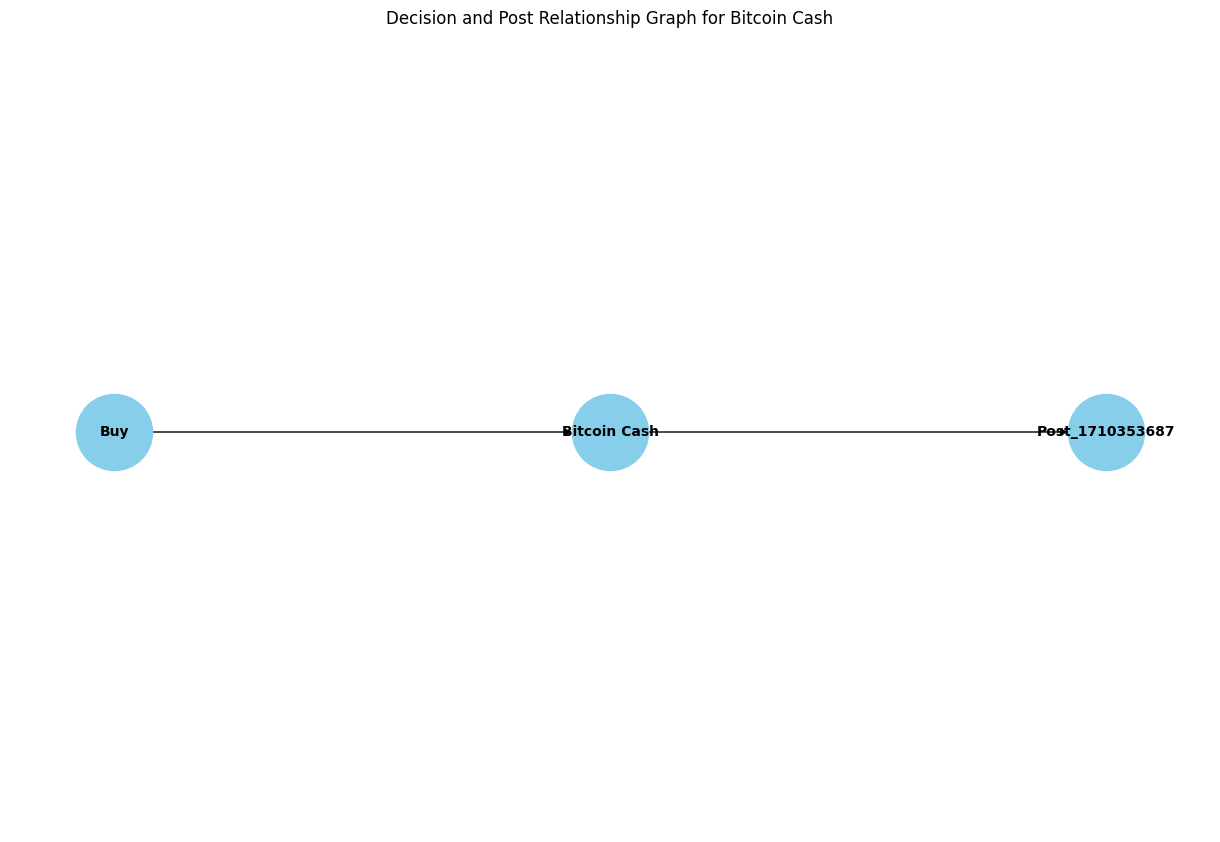

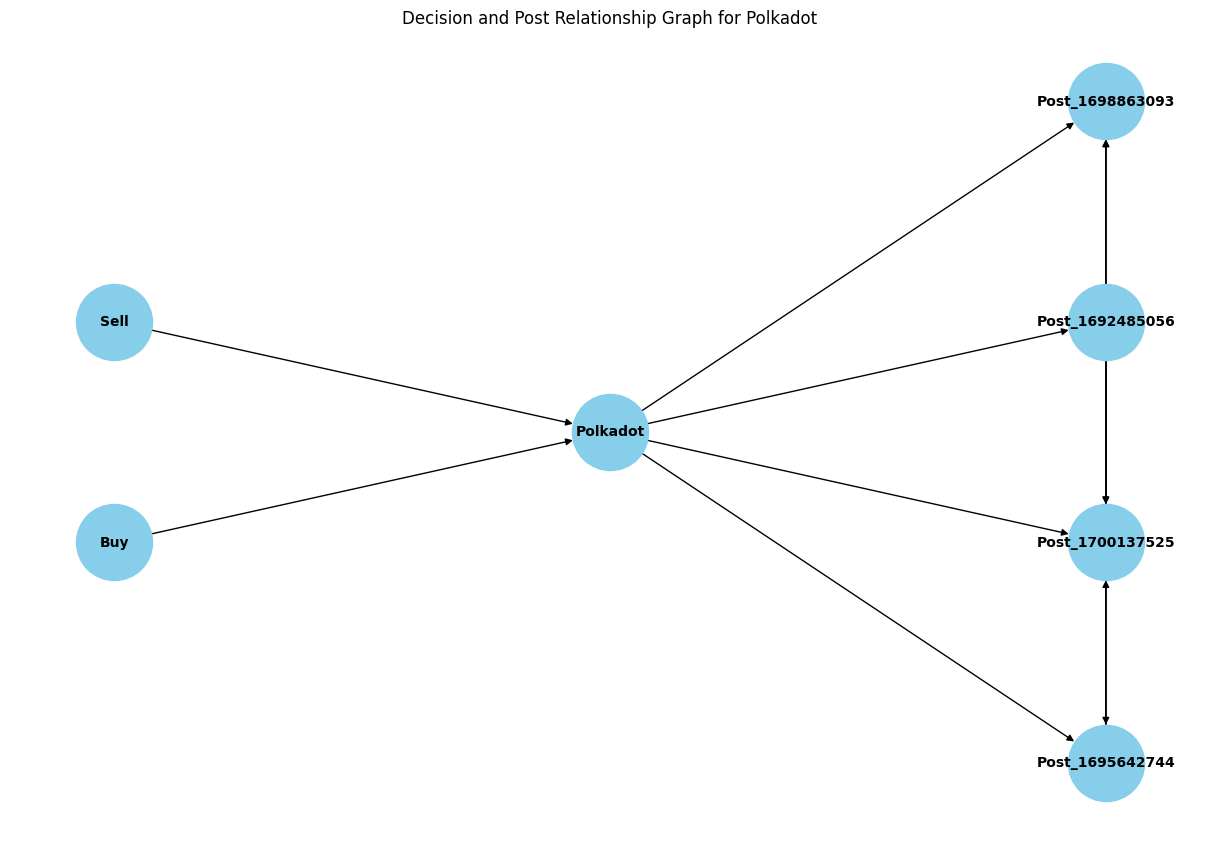

In [36]:
import networkx as nx
import matplotlib.pyplot as plt

# Add a column to determine buy/sell decision based on polarity
df_final['Decision'] = df_final['Polarity'].apply(lambda x: 'Buy' if x > 0 else 'Sell')

# Filter out invalid topics
df_final = df_final[df_final['Topic'].notna()]

# Function to create and visualize graph for a specific topic
def create_topic_graph(topic_df, topic):
    G = nx.DiGraph()
    
    # Add nodes and edges for decisions
    decisions = topic_df['Decision'].unique()
    for decision in decisions:
        G.add_node(decision, label=decision, layer=0)
    
    # Add topic node
    G.add_node(topic, label=topic, layer=1)
    for decision in decisions:
        G.add_edge(decision, topic)
    
    # Add nodes and edges for posts
    for _, row in topic_df.iterrows():
        post_label = f"Post_{row['Timestamp']}"
        G.add_node(post_label, label=post_label, layer=2)
        G.add_edge(topic, post_label)
        
        # Connect posts based on timestamp
        for other_index, other_row in topic_df.iterrows():
            if other_row['Timestamp'] > row['Timestamp']:
                other_post_label = f"Post_{other_row['Timestamp']}"
                G.add_edge(post_label, other_post_label)
    
    # Define the positions of nodes for visualization
    pos = nx.multipartite_layout(G, subset_key="layer")
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=3000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
    plt.title(f'Decision and Post Relationship Graph for {topic}')
    plt.show()

# Create and visualize graph for each topic
topics = df_final['Topic'].unique()
for topic in topics:
    topic_df = df_final[df_final['Topic'] == topic]
    create_topic_graph(topic_df, topic)

In [50]:
solana_df = df_final[df_final['Topic'] == 'Solana']
solana_df.sort_values(by="Timestamp")

,Trader,Title,Topic,Post length,Post type,Timestamp,Text,Word count,Stop words count,Stop word %,Lemmatized,Lemmatized_Count,Polarity,Subjectivity,Decision
655,without_worries,"Litecoin (LTC), imminent collapse to $30?",Solana,18,Update post 3,1706009783,Comment:\nPrice action absolutely must close a...,56,29,51.79,price action absolutely must close 80 dollar e...,2,0.050000,0.575000,Buy
56,AlanSantana,✴️ Solana 4X SHORT (222% Profits Potential),Solana,3,Update post 1,1715877419,Comment:\nNotice how the reversal is happening...,10,4,40.00,notice reversal happening right resistance,0,0.285714,0.535714,Buy
309,MoralDisciple,Solana analysis BULLISH!,Solana,8,Initial post,1716448214,Everything is pumping and the main thing is st...,15,6,40.00,everything pumping main thing still ahead wish...,0,0.233333,0.166667,Buy
310,MoralDisciple,Solana analysis BULLISH!,Solana,8,Update post 1,1716449831,Comment:\nAll altcoins give BS at the same tim...,23,13,56.52,altcoins give b time right ath yet today come,1,0.285714,0.535714,Buy
311,MoralDisciple,Solana analysis BULLISH!,Solana,8,Update post 2,1716656609,"Comment:\nAltcoins have BS today, today we see...",60,29,48.33,altcoins b today today see b cool ok normal ne...,4,0.187500,0.474537,Buy
312,MoralDisciple,Solana analysis BULLISH!,Solana,8,Update post 3,1716657318,Comment:\nI remember when I entered many coins...,74,40,54.05,remember entered many coin expect sol could su...,2,0.430000,0.570000,Buy
313,MoralDisciple,Solana analysis BULLISH!,Solana,8,Update post 4,1716657419,Comment:\nWe need to expand our investments mo...,11,5,45.45,need expand investment enable miracle,2,0.000000,0.000000,Sell
315,MoralDisciple,Solana analysis BULLISH!,Solana,8,Update post 6,1717180932,Comment:\nI'm still waiting for the BS to cool...,23,10,43.48,still waiting b cool many coin bullish big pic...,2,0.087500,0.537500,Buy
57,AlanSantana,✴️ Solana 4X SHORT (222% Profits Potential),Solana,3,Update post 2,1718150037,"Comment:\nNothing changes, we continue advocat...",21,8,38.10,nothing change continue advocating patience bi...,1,0.050000,0.400000,Buy


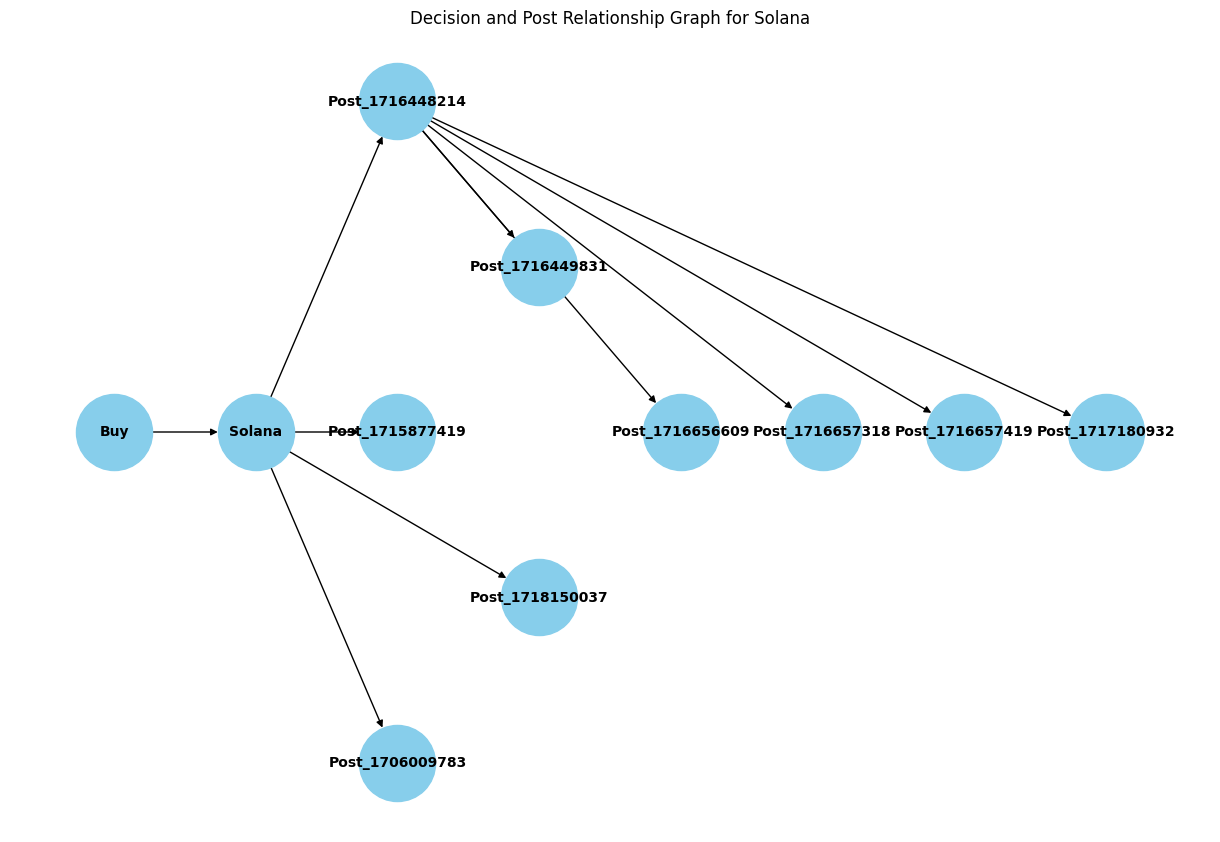

In [47]:
# Filter for the topic "Solana"
solana_df = df_final[df_final['Topic'] == 'Solana']

# Ensure there are Solana posts
if not solana_df.empty:
    # Function to create and visualize graph for Solana topic
    def create_solana_graph(topic_df):
        G = nx.DiGraph()
        
        # Add the decision node
        decision = topic_df['Decision'].iloc[0]  # Assuming all decisions are the same
        G.add_node(decision, label=decision, layer=0)
        
        # Add the topic node
        topic = 'Solana'
        G.add_node(topic, label=topic, layer=1)
        G.add_edge(decision, topic)
        
        # Sort posts by timestamp
        topic_df = topic_df.sort_values(by='Timestamp')
        
        # Add nodes and edges for posts, and determine their levels
        previous_post_labels = {}
        title_level = {}
        
        for _, row in topic_df.iterrows():
            post_label = f"Post_{row['Timestamp']}"
            title = row['Title']
            
            # Determine the level for the post
            if title not in title_level:
                title_level[title] = 2  # Start levels from 2
            else:
                title_level[title] += 1
            
            # Add post node
            G.add_node(post_label, label=post_label, layer=title_level[title])
            
            if row['Post type'] == 'Initial post':
                # Connect initial post to the topic
                G.add_edge(topic, post_label)
                previous_post_labels[title] = post_label
            else:
                # Connect updates to their initial posts
                if title in previous_post_labels:
                    initial_post_label = previous_post_labels[title]
                    G.add_edge(initial_post_label, post_label)
                else:
                    # If no initial post found, connect to topic
                    G.add_edge(topic, post_label)
        
        # Define the positions of nodes for visualization
        pos = nx.multipartite_layout(G, subset_key="layer")
        
        # Draw the graph
        plt.figure(figsize=(12, 8))
        nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=3000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
        plt.title('Decision and Post Relationship Graph for Solana')
        plt.show()
    
    # Create and visualize graph for Solana topic
    create_solana_graph(solana_df)
else:
    print("No posts for the topic 'Solana'.")